In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration and Cleaning

# Q.1 load the data

In [3]:
data= pd.read_csv("netflix_titles1.csv", encoding="ISO-8859-1")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2-Mar-19,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8807,s8808,TV Show,Parasyte: The Grey,Yeon Sang-ho,"Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan",South Korea,5-Apr-24,2024,TV-MA,1 Season,"Sci-fi, Horror, Action",A new breed of parasitic aliens arrive on Eart...


In [4]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# investigate the data

# Q1 Missing Values:

In [5]:
# to check the missing values
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
#Analyze the number of missing values and their distribution across columns
missing_counts= data.isnull().sum()
missing_percentage = (missing_counts / len(data)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage': missing_percentage
})

missing_data = missing_data[missing_data['Missing Values'] > 0]

# Display the summary of my missing data
pd.DataFrame(missing_data)

,Missing Values,Percentage
director,2634,29.901237
cast,825,9.365422
country,831,9.433534
date_added,10,0.113520
rating,4,0.045408
duration,3,0.034056


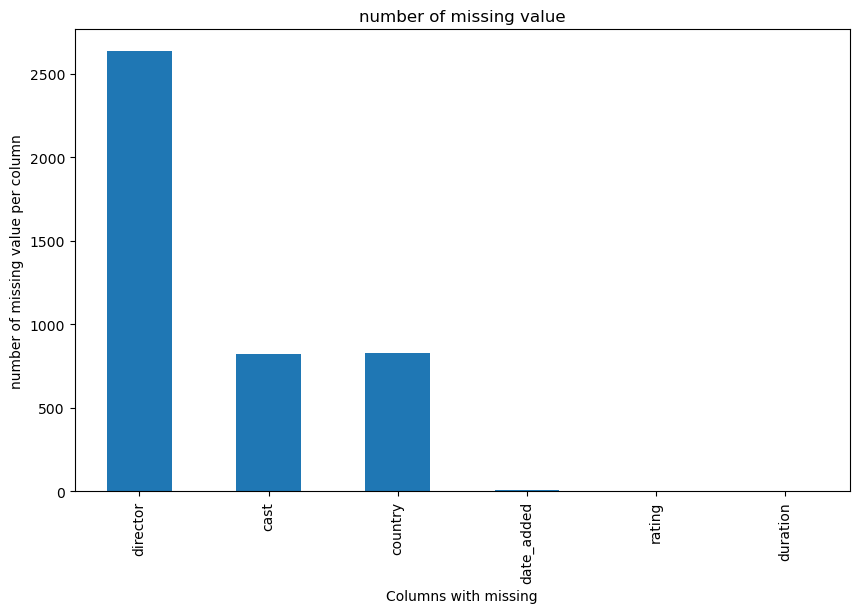

In [7]:
# the distribution of the missing values 
plt.figure(figsize=(10,6))
missing_data["Missing Values"].plot(kind="bar")
plt.title("number of missing value")
plt.ylabel("number of missing value per column")
plt.xlabel("Columns with missing")
plt.show()

In [8]:
data1=data.fillna("unknown")
data1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2-Mar-19,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8807,s8808,TV Show,Parasyte: The Grey,Yeon Sang-ho,"Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan",South Korea,5-Apr-24,2024,TV-MA,1 Season,"Sci-fi, Horror, Action",A new breed of parasitic aliens arrive on Eart...


In [9]:
data1.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Q2.Data type:

In [10]:
# data type
data1.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

# Q3. Descriptive statistics:

In [11]:
#Descriptive Statistics

data.describe()

,release_year
count,8809.000000
mean,2014.181292
std,8.818932
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2024.000000


In [12]:
#Analyze these statistics to understand the central tendencies and spread of the data
# there is outlies that pulls the mean to the 1st quartile of our dataset


# Q4. Categorical Data Analysis

In [13]:

#Identify categorical columns 
data3=data1[["type","listed_in"]]
data3

,type,listed_in
0,Movie,Documentaries
1,TV Show,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,"Docuseries, Reality TV"
4,TV Show,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...
8804,Movie,"Comedies, Horror Movies"
8805,Movie,"Children & Family Movies, Comedies"
8806,Movie,"Dramas, International Movies, Music & Musicals"
8807,TV Show,"Sci-fi, Horror, Action"


In [14]:
#to explore the distribution of the data
data3['type'].value_counts() 

type
Movie      6132
TV Show    2677
Name: count, dtype: int64

In [15]:
data3["listed_in"].value_counts()

listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Horror Movies, LGBTQ Movies, Music & Musicals           1
Drama, Romance, Thriller                                1
Name: count, Length: 516, dtype: int64

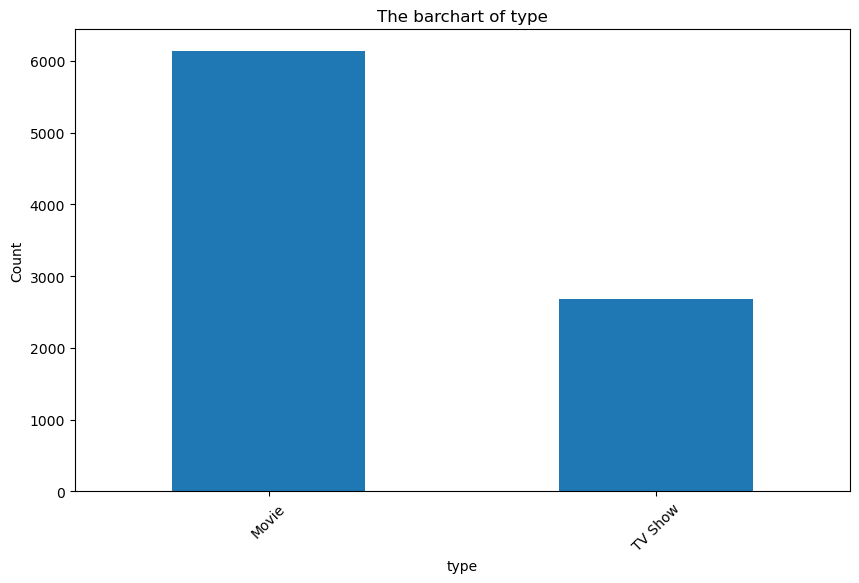

In [16]:
#Visualize the distribution of categorical data using bar charts on the tpye column.
plt.figure(figsize=(10, 6))
data3['type'].value_counts().plot(kind='bar')
plt.title("The barchart of type")
plt.xlabel("type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

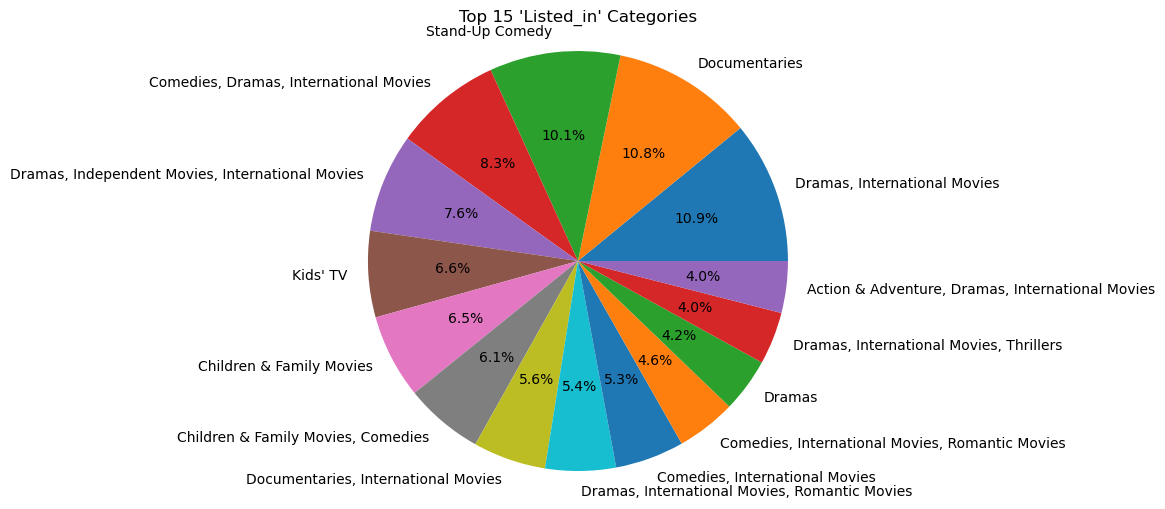

In [17]:
#Visualize the distribution of categorical data using pie chart on the listed_in column
top_10_listed_in = data3['listed_in'].value_counts().nlargest(15)

plt.figure(figsize=(10, 6))
plt.pie(top_10_listed_in, labels=top_10_listed_in.index, autopct='%1.1f%%')
plt.title("Top 15 'Listed_in' Categories")
plt.axis('equal')  
plt.show()


# Q5.clean the data


In [21]:
# drop na in rating and duration , replace na in 
data4= data.dropna(subset=['rating', 'duration'])

data4

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2-Mar-19,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8807,s8808,TV Show,Parasyte: The Grey,Yeon Sang-ho,"Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan",South Korea,5-Apr-24,2024,TV-MA,1 Season,"Sci-fi, Horror, Action",A new breed of parasitic aliens arrive on Eart...


In [22]:
 pd.options.mode.copy_on_write = True 
data4['date_added'] = data4['date_added'].fillna("1-Jan-21")
data4

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2-Mar-19,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8807,s8808,TV Show,Parasyte: The Grey,Yeon Sang-ho,"Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan",South Korea,5-Apr-24,2024,TV-MA,1 Season,"Sci-fi, Horror, Action",A new breed of parasitic aliens arrive on Eart...


In [23]:
df=data4.fillna("unknown")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2-Mar-19,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8807,s8808,TV Show,Parasyte: The Grey,Yeon Sang-ho,"Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan",South Korea,5-Apr-24,2024,TV-MA,1 Season,"Sci-fi, Horror, Action",A new breed of parasitic aliens arrive on Eart...


# Data visualization

# Q1.Release Year Distribution

Text(0.5, 1.0, 'release_year')

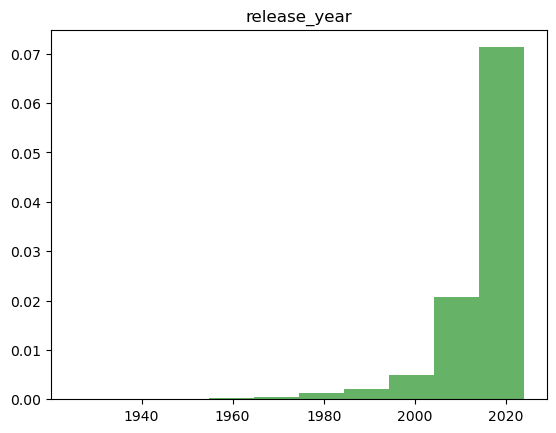

In [24]:
# To create a histogram or density plot to visualize the distribution of the "release_year" column using Matplotlib
plt.hist(df["release_year"], bins=10, density=True, alpha=0.6, color='g')
plt.title("release_year")

C:\Users\educa\AppData\Local\Temp\ipykernel_28800\3675622630.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["release_year"], shade=True)


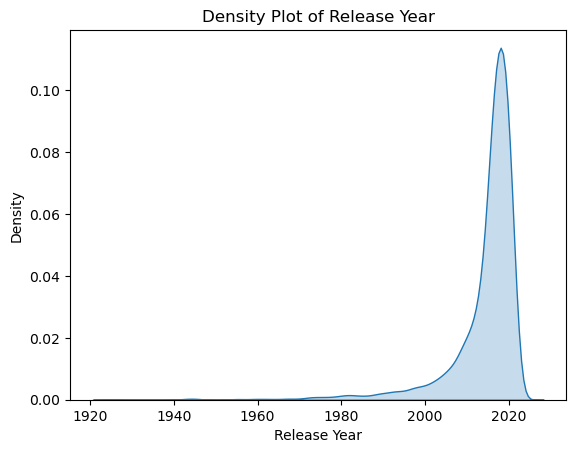

In [25]:
# the density plot of the release_year
sns.kdeplot(df["release_year"], shade=True)
plt.title("Density Plot of Release Year")
plt.xlabel("Release Year")
plt.ylabel("Density")
plt.show()

In [26]:
#Analyze the plot to identify trends over time (e.g., are there more recent additions to the platform?).
# there is no more recent additions to the platform, according to the density plot there is descrease in additions.
# there was an increase up to 2020 and latter the addition starts to descrease.

# Q2 .Rating by Type

In [27]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR', 'A'], dtype=object)


Average Rating by Type:
type
Movie      3.970622
TV Show    4.010841
Name: rating_num, dtype: float64


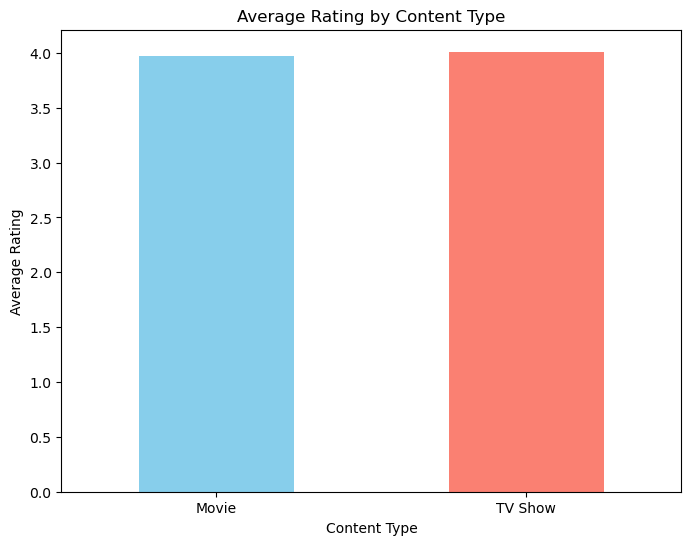

In [28]:
rating_mapping = {
    'TV-G': 0,
    'NR': 0,
    'UR': 0,
    'TV-Y': 0,
    'G': 0,
    'PG': 1,
    'TV-PG': 1,
     'PG-13': 2,
    'TV-Y7': 3,
    'TV-Y7-FV': 3,
     'TV-14': 4,
    'R': 5,
    'TV-MA': 6,
    'A': 6,
    'NC-17': 6
}

df['rating_num'] = df['rating'].map(rating_mapping)
# Handle any unmapped ratings (shouldn't be necessary if all ratings are covered)
df['rating_num'].fillna(0, inplace=True)

# Calculate the average rating for each type
average_rating = df.groupby('type')['rating_num'].mean()
print("\nAverage Rating by Type:")
print(average_rating)

# Create a bar chart to compare average ratings
average_rating.plot(kind='bar', color=['skyblue', 'salmon'], figsize=(8, 6))
plt.title('Average Rating by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

# Q3.Duration vs Rating

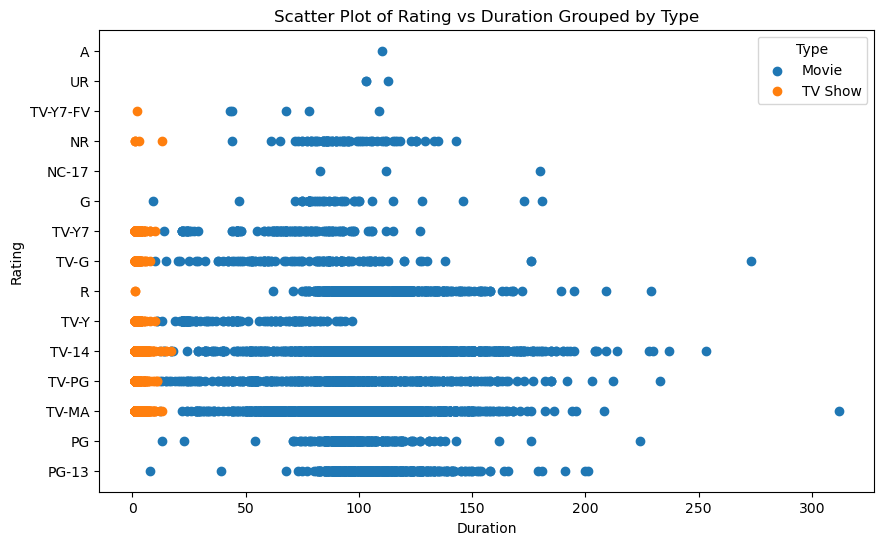

In [52]:
# rating versus duration
def extract_numeric_duration(duration):
    if pd.isna(duration):
        return None
    duration_str = str(duration)  # Ensure duration is treated as a string
    numeric_str = ''.join(filter(str.isdigit, duration_str))
    return int(numeric_str) if numeric_str else None

df['duration'] = df['duration'].apply(extract_numeric_duration)
types = df['type'].unique()

plt.figure(figsize=(10, 6))

for t in types:
    subset = df[df['type'] == t]
    plt.scatter(subset['duration'], subset['rating'], label=t)

plt.title('Scatter Plot of Rating vs Duration Grouped by Type')
plt.xlabel('Duration')
plt.ylabel('Rating')
plt.legend(title='Type')
plt.show()

# Q4.Genre Exploration


In [38]:
# to identify the most frequent genres in the dataset.
df['listed_in'].explode().value_counts()

listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Horror Movies, LGBTQ Movies, Music & Musicals           1
Drama, Romance, Thriller                                1
Name: count, Length: 516, dtype: int64

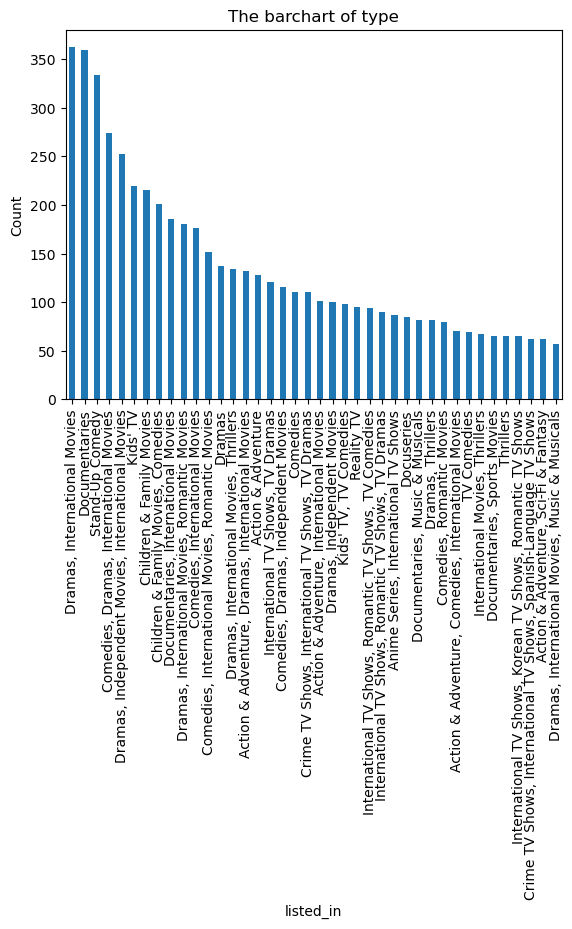

In [42]:
# to Create a bar chart or word cloud to visualize the distribution of genres
df["listed_in"].explode().value_counts().nlargest(40).plot(kind="bar")
plt.title("The barchart of type")
plt.xlabel("listed_in")
plt.ylabel("Count")
plt.show()

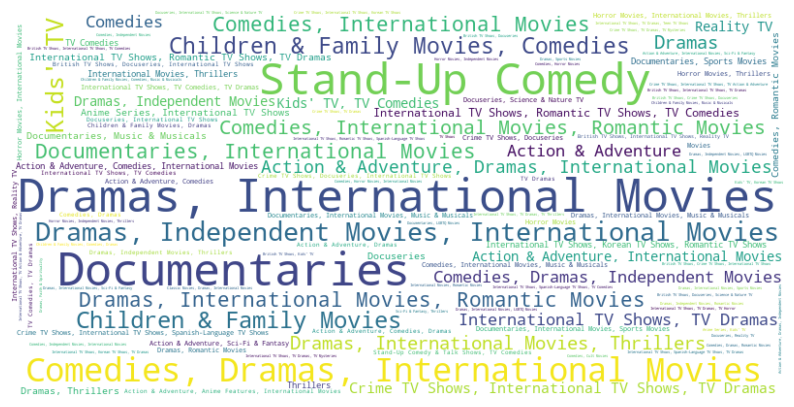

In [43]:
# to generate the word cloud
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Count the occurrences of each genre
genre_counts = df['listed_in'].value_counts()


# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Task 3: Building a Simple Recommendation Model

# Q1.Identify Features

In [58]:
# Based on your data exploration, to choose features you believe might influence user ratings 
df2=df[["release_year","duration","rating","listed_in"]]
df2

,release_year,duration,rating,listed_in
0,2020,90,PG-13,Documentaries
1,2021,2,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
2,2021,1,TV-MA,"Crime TV Shows, International TV Shows, TV Act..."
3,2021,1,TV-MA,"Docuseries, Reality TV"
4,2021,2,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...
8804,2009,88,R,"Comedies, Horror Movies"
8805,2006,88,PG,"Children & Family Movies, Comedies"
8806,2015,111,TV-14,"Dramas, International Movies, Music & Musicals"
8807,2024,1,TV-MA,"Sci-fi, Horror, Action"


In [45]:
df2.dtypes

release_year     int64
duration         int64
rating          object
listed_in       object
dtype: object

In [51]:
df2.isnull().sum()

release_year    0
duration        0
rating          0
listed_in       0
dtype: int64

# Q.2 Preprocess the Data

In [69]:
# the dataframe for the numerical features entitled df3
df3=df[["release_year","duration","rating_num","rating"]]
df3

,release_year,duration,rating_num,rating
0,2020,90,2,PG-13
1,2021,2,6,TV-MA
2,2021,1,6,TV-MA
3,2021,1,6,TV-MA
4,2021,2,6,TV-MA
...,...,...,...,...
8804,2009,88,5,R
8805,2006,88,1,PG
8806,2015,111,4,TV-14
8807,2024,1,6,TV-MA


In [72]:
# to Split the data into separate DataFrames for features (X) and target variable (ratings - y)
X_df=df3.drop(["rating_num","rating"],axis=1)
X_df.head()

,release_year,duration
0,2020,90
1,2021,2
2,2021,1
3,2021,1
4,2021,2


In [73]:
y_df=df[["rating_num"]]
y_df.head()

,rating_num
0,2
1,6
2,6
3,6
4,6


In [64]:
#Handle categorical features using encoding techniques 
df4=df2[["listed_in","rating"]]
df4

,listed_in,rating
0,Documentaries,PG-13
1,"International TV Shows, TV Dramas, TV Mysteries",TV-MA
2,"Crime TV Shows, International TV Shows, TV Act...",TV-MA
3,"Docuseries, Reality TV",TV-MA
4,"International TV Shows, Romantic TV Shows, TV ...",TV-MA
...,...,...
8804,"Comedies, Horror Movies",R
8805,"Children & Family Movies, Comedies",PG
8806,"Dramas, International Movies, Music & Musicals",TV-14
8807,"Sci-fi, Horror, Action",TV-MA


In [65]:

from sklearn.feature_extraction import DictVectorizer
# Split 'listed_in' into lists of genres
df4['listed_in'] = df4['listed_in'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)

# Convert lists of genres into dictionaries
listed_in_dicts = df4['listed_in'].apply(lambda x: {genre: 1 for genre in x})

# Use DictVectorizer to one-hot encode the genres
vec = DictVectorizer(sparse=False, dtype=int)
listed_in_matrix = vec.fit_transform(listed_in_dicts)

# Create a DataFrame from the matrix
listed_in_df = pd.DataFrame(listed_in_matrix, columns=vec.get_feature_names_out())

listed_in_df

,Action,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,...,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thriller,Thrillers
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8797,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8798,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8800,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Q3.Train-Test Split

# Q3 , Q4 and Q5 .	Train-Test Split,Build a Linear Regression Model, and Evaluate Model Performance

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Example data (assuming X_df and y_df are already defined as DataFrames or Series)
# X_df = ... (your features dataframe)
# y_df = ... (your target variable)

# Split the data with 75% in each set
X1, X2, y1, y2 = train_test_split(X_df, y_df, random_state=0, train_size=0.75)

# Create and fit the model on one set of data
model = LinearRegression(fit_intercept=True)
model.fit(X1, y1)

# Evaluate the model on the second set of data
y2_model = model.predict(X2)

# Calculate the Mean Squared Error
mse = mean_squared_error(y2, y2_model)
print(f'Mean Squared Error: {mse}')

# Calculate the R-squared score
r2 = r2_score(y2, y2_model)
print(f'R-squared: {r2}')


Mean Squared Error: 3.8980669025579533
R-squared: 0.026383353060297043
